# Exercise 4.1 - Solution


In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Disclaimer**

The book mistakently refers to the page for Exercise 4.2 when introducting Exercise 4.1, etc. Of course, these numbers should match: Book Exercise 4.1 is discussed under Exercise 4.1 

**Simple Network**

We continue with the dataset first encountered in Exercise 3.2. Please refer to the discussion there for an introduction to the data and the learning objective.

Here, we manually implement a simple network architecture

In [2]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

/bin/sh: wget: command not found


In [3]:
# Before working with the data, 
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
# (remember array slicing from last week)
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [6.300e+00 2.700e-01 1.800e-01 7.700e+00 4.800e-02 4.500e+01 1.860e+02
 9.962e-01 3.230e+00 4.700e-01 9.000e+00]
Quality: 5.0


# Solutions

The goal is to implement the training of a neural network with one input layer, one hidden layer, and one output layer using gradient descent. We first (below) define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:
  * W: (number of hidden nodes, number of inputs) named `W`
  * b: (number of hidden nodes) named `b`
  * W': (number of hidden nodes) named `Wp`
  * b': (one) named `bp`

Your tasks are:     
   * Implement a forward pass of the network as `dnn` (see below)
   * Implement a function that uses one data point to update the weights using gradient descent. You can follow the `update_weights` skeleton below
   * Now you can use the code below (training loop and evaluation) to train the network for multiple data points and even over several epochs. Try to find a set of hyperparameters (number of nodes in the hidden layer, learning rate, number of training epochs) that gives stable results. What is the best result (as measured by the loss on the training sample) you can get?

In [4]:
# Initialise weights with suitable random distributions
hidden_nodes = 50 # number of nodes in the hidden layer
n_inputs = 11 # input features in the dataset

# See section 4.3 of the book for more information on
# how to initialise network parameters
W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

print(W.shape)

(50, 11)


In [5]:
# You can use this implementation of the ReLu activation function
def relu(x):
    return np.maximum(x, 0)

In [6]:
def dnn(x,W,b,Wp,bp):
    # SOLUTION
    # sum_i W'_ki*Relu(sum_j W_ij*x_j + b_i) + b'_k 
    return np.dot(Wp, relu(np.dot(W,x) + b)) + bp

In [7]:
def update_weights(x,y, W, b, Wp, bp):
    
    lr = 0.00005

    # SOLUTION

    # Calculate the network output
    phi = dnn(x,W,b,Wp,bp)

    # Use the formulas derived to calculate the gradient for each of W,b,Wp,bp
    delta_bp = 2 * (phi - y)
    delta_Wp = 2 * (phi - y) * relu(np.dot(W,x) + b)
    delta_b  = 2 * (phi - y) * Wp * np.heaviside(np.dot(W,x) + b, 0.5)
    delta_W  = 2 * (phi - y) * np.outer(Wp * np.heaviside(np.dot(W,x) + b, 0.5), x)
                
    # Update the weights/bias following the rule:  X_new = X_old - learning_rate * gradient    
    bp -= lr * delta_bp
    Wp -= lr * delta_Wp
    b  -= lr * delta_b
    W  -= lr * delta_W
 
    
    return -1 # no return value needed, you can modify the weights in-place

# Training loop and evaluation below

Epoch: 0 Train Loss: 5.645403582072304 Test Loss: 5.789360719845873
Epoch: 1 Train Loss: 1.1533433753334428 Test Loss: 1.1637637243130456
Epoch: 2 Train Loss: 0.8064459925389651 Test Loss: 0.8256775797887149
Epoch: 3 Train Loss: 0.7194986944212736 Test Loss: 0.7463420451468886
Epoch: 4 Train Loss: 0.6823412559002283 Test Loss: 0.6977324105881756
Epoch: 5 Train Loss: 0.6664846138051684 Test Loss: 0.6876245778967164
Epoch: 6 Train Loss: 0.6587998893746104 Test Loss: 0.6813185867359125
Epoch: 7 Train Loss: 0.6542220249941378 Test Loss: 0.6763715413742601
Epoch: 8 Train Loss: 0.6515229736431492 Test Loss: 0.6726972058370031
Epoch: 9 Train Loss: 0.6500603789067503 Test Loss: 0.6696083273661432
Epoch: 10 Train Loss: 0.6493454499784376 Test Loss: 0.6681520553512201
Epoch: 11 Train Loss: 0.6555439871036638 Test Loss: 0.6725116282689468
Epoch: 12 Train Loss: 0.6550890293925202 Test Loss: 0.6699690448726485
Epoch: 13 Train Loss: 0.6526835138767458 Test Loss: 0.6670276424175429
Epoch: 14 Train Lo

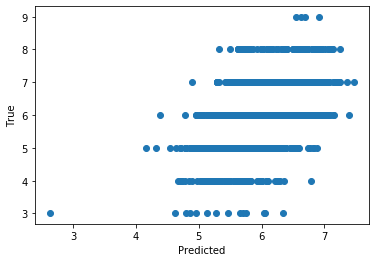

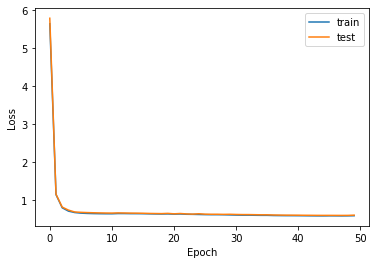

In [8]:
# The code below implements the training.
# If you correctly implement  dnn and update_weights above, 
# you should not need to change anything below. 
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
n_epochs = 50

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        update_weights(x,y,W,b,Wp,bp)
    
    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
    
# Prepare scatter plot
y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


# Hint 1

We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads:
$$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$$

# Hint 2

For the regression problem the objective function is the mean squared error between the prediction and the true label $y$:
$$
L=(\hat{y}-y)^{2}
$$

Taking the partial derivatives - and diligently the applying chain rule - with respect to the different objects yields:
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{m}\right) x_{k}
\end{aligned}

Here, $\Theta$ denotes the Heaviside step function.